<a href="https://colab.research.google.com/github/saidileep-knv/Credit-Card-Fraud-Detection/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION**

#Part 1 - DEFINE

**Author:** Naga Venkata Saidileep Korlapati

**Email:** saidileep.knv@tamu.edu

---



**----Define the Problem----**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**The aim of this project is to identify fraudulent credit card transactions.**

The analysis is aimed at explaining every step of the process from defining the problem, discovering dataset, developing classification models and deploying into production.

The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.




In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import os
os.chdir("./gdrive/My Drive/Colab Notebooks")

In [0]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, auc, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings("ignore")

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Part 2 - DISCOVER

----Load the data----

In [0]:
df = pd.read_csv("creditcard.csv")

In [5]:
#Expore the headers of the dataset
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print(df.shape)

(284807, 31)


In [8]:
df.describe()
#Class = 1, Flagged as Fraudulent Transaction
#Class = 0, Flagged as Non-Fraudulent Transaction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [10]:
#Check for Null Values
df.isnull().any().sum()

0

There is no missing data in the given dataset.

In [11]:
#Check for Fraud transactions in the dataset.
print("Non_Fraud transactions consist of", round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset.')
print("Fraud transactions consist of", round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of the dataset.')


Non_Fraud transactions consist of 99.83 % of the dataset.
Fraud transactions consist of 0.17 % of the dataset.


The classes are heavily skewed. This is an imbalanced case where most of the transactions are not fraud (valid).

If the dataset is used as is, most of the transactions would be classified as valid as the model probably overfits since it might assume that most transactions are valid.

Therefore, accuracy score of the model cannot be used as an evaluation metric, instead the evaluation can be based on F1-score, precision/recall score.

###**Explore the data (EDA)**

Text(0, 0.5, 'Frequency')

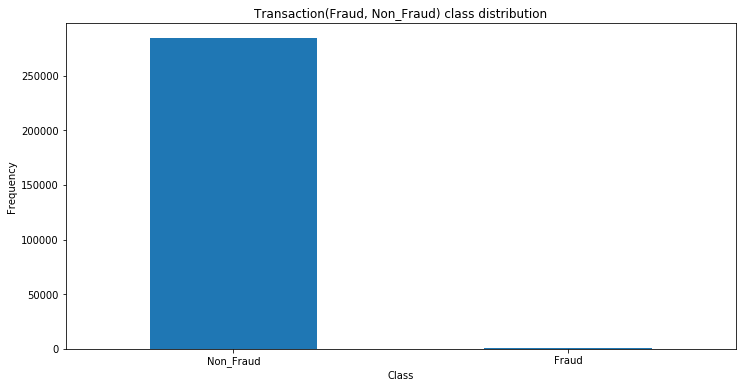

In [12]:
labels = ['Non_Fraud', 'Fraud']
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction(Fraud, Non_Fraud) class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [13]:
#Graphing the time of the day that Fraud occurs:
df['Hour'] = df['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
#Break down Fraud vs Non_Fraud transactions via a pivot table
df.pivot_table(values='Amount', index='Hour',columns='Class',aggfunc='count')

Class,0,1
Hour,,
0.0,10919,21
1.0,7687,6
2.0,4212,10
3.0,3269,57
4.0,3476,17
5.0,2185,23
6.0,2979,11
7.0,4093,9
8.0,7219,23


In [0]:
#Define a helper function to plot the histogram of Fraud/Non_Fraud transactions per hour of the day 
def PlotHistogram(df,norm):
    bins = np.arange(df['Hour'].min(),df['Hour'].max()+2)
    plt.figure(figsize=(15,4))
    sns.distplot(df[df['Class']==0.0]['Hour'],
                 norm_hist=norm,
                 bins=bins,
                 kde=False,
                 color='g',
                 hist_kws={'alpha':.5},
                 label='Non_Fraud Transactions')
    sns.distplot(df[df['Class']==1.0]['Hour'],
                 norm_hist=norm,
                 bins=bins,
                 kde=False,
                 color='r',
                 hist_kws={'alpha':.5},
                 label='Fradulent Transactions')
    plt.title("Normalized Histogram of Non_Fraud/Fraud Transactions Per Hour of the Day")
    plt.xticks(range(0,24))
    plt.legend()
    plt.show()

**----Inferrence from Visualization Plots----**

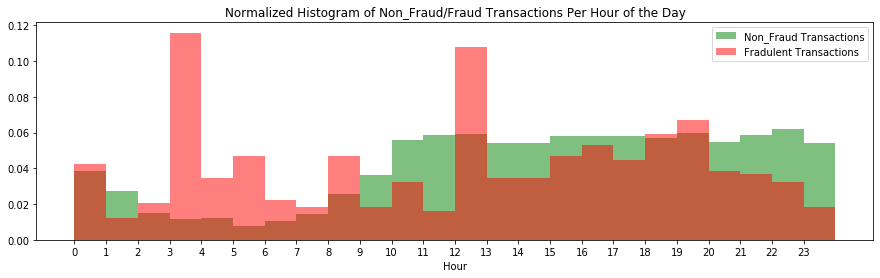

In [15]:
PlotHistogram(df, True)

It is clear that the maximum number of Fraud transactions are happening during 3:00am to 4:00am, 12:00pm to 1:00pm and 7:00pm - 8:00pm.

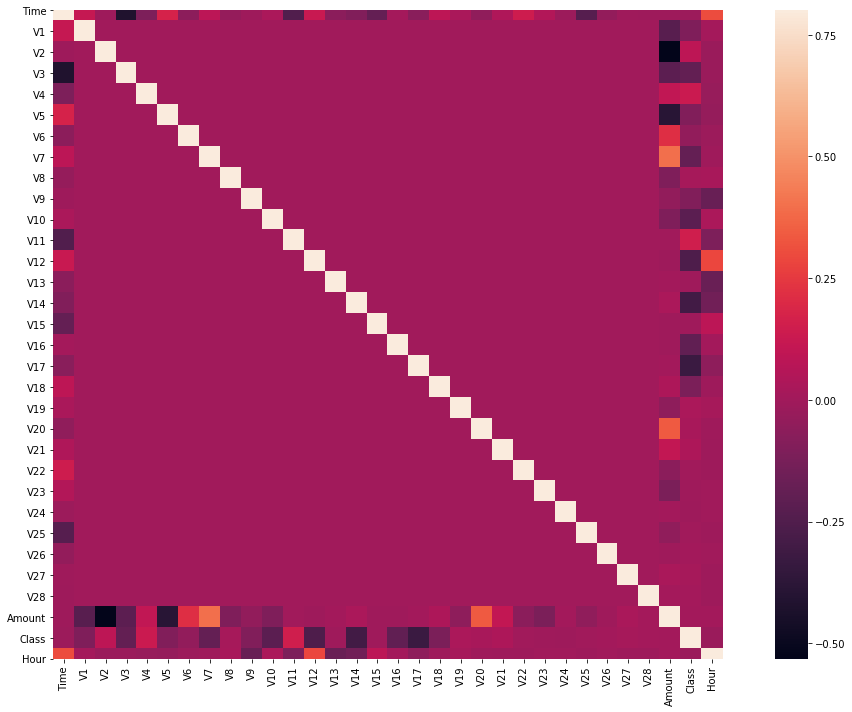

In [16]:
cormat = df.corr()
fig = plt.figure(figsize = (15,10))

sns.heatmap(cormat, vmax = .8, square = True)
plt.tight_layout()
plt.show()

In [0]:
Fraud = df[df['Class'] == 1]
Non_Fraud = df[df['Class'] == 0]

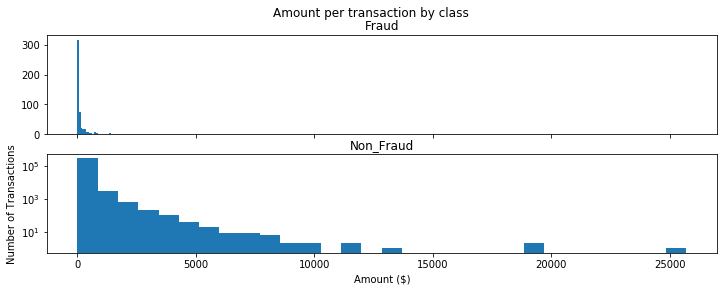

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
f.suptitle('Amount per transaction by class')
ax1.hist(df.Amount[df.Class == 1], bins = 30)
ax1.set_title('Fraud')
ax2.hist(df.Amount[df.Class == 0], bins = 30)
ax2.set_title('Non_Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

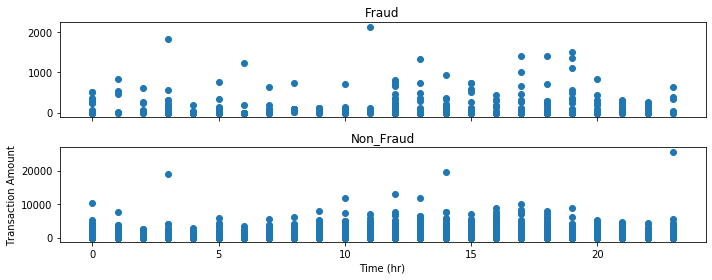

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))
ax1.scatter(Fraud.Hour, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Non_Fraud.Hour, Non_Fraud.Amount)
ax2.set_title('Non_Fraud')
plt.xlabel('Time (hr)')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()

We see that there is no particular trend in the fraudulent transactions associated with the time column. We can neglect time columns for the analysis.

It can further be emphasized from the distribution plot below.

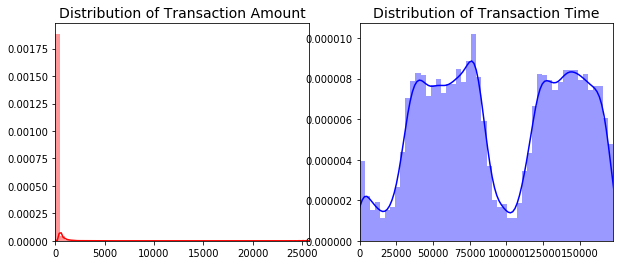

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax1, color='r')
ax1.set_title('Distribution of Transaction Amount', fontsize=14)
ax1.set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax2, color='b')
ax2.set_title('Distribution of Transaction Time', fontsize=14)
ax2.set_xlim([min(time_val), max(time_val)])

plt.show()

Normalize the Amount column since it's not in line with the other columns


In [0]:
df['Amount_Scaled'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [0]:
df = df.drop(['Hour'], axis=1)
df = df.drop(['Time'], axis=1)
df = df.drop(['Amount'], axis=1)

In [0]:
##Add the scaled columns of time and amount at the beginning of the data
Amount = df['Amount_Scaled']
df.drop(['Amount_Scaled'], axis=1, inplace=True)
df.insert(0, 'Amount', Amount)

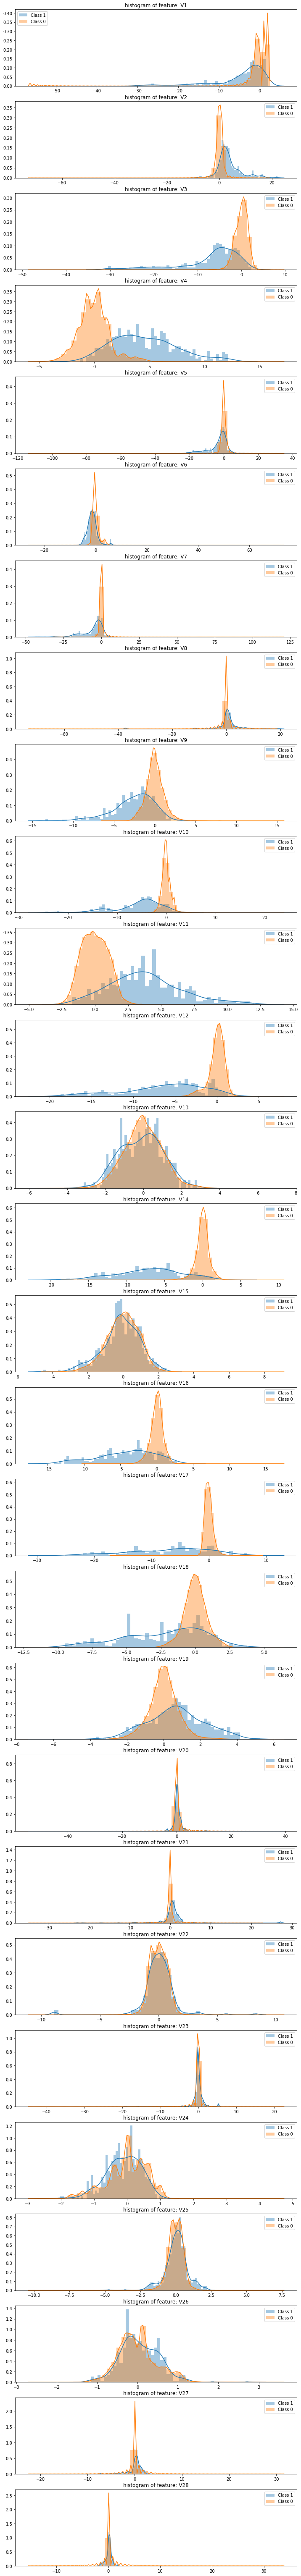

<Figure size 864x432 with 0 Axes>

In [24]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i in range(1, 29):
    ax = plt.subplot(gs[i-1])
    sns.distplot(df['V'+str(i)][df.Class == 1], bins=50)
    sns.distplot(df['V'+str(i)][df.Class == 0], bins=50)
    ax.legend(['Class 1','Class 0'])
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + 'V'+str(i))
plt.show()
plt.tight_layout()

We can see that some features have very similar distributions (completely overlap) between the two types of transactions.

V8, V13, V15, V20, V22, V23, V24, V25, V26, V27, V28 do not really help us to differentiate between classes

In [25]:
outlier_fraction = len(Fraud) / float(len(Non_Fraud))
print(round(outlier_fraction,4))

print("Fraud Cases: {}".format(len(Fraud)))
print("Non_Fraud Cases: {}".format(len(Non_Fraud)))

0.0017
Fraud Cases: 492
Non_Fraud Cases: 284315


##Under Sampling

In [0]:
#indices of fraud and non_fraud cases:
Num_Fraud = len(df[df["Class"]==1]) #Total number of fraud cases
Fraud_Indices = np.array(df[df["Class"]==1].index)
Non_Fraud_Indices = np.array(df[df["Class"]==0].index)

In [0]:
#randomly select "n" number of indices of the normal class... n being the total number of fraud cases
Random_Non_Fraud_Indices = np.random.choice(Non_Fraud_Indices,Num_Fraud, replace=False)
Random_Non_Fraud_Indices = np.array(Random_Non_Fraud_Indices)

In [0]:
# Append the two indices:
under_sample_indices = np.concatenate([Fraud_Indices,Random_Non_Fraud_Indices])

In [29]:
# Under Sampling Dataset:
under_sample_data = df.iloc[under_sample_indices,:]
print ("% of Non_Fraudulent Transactions: ",len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print ("% of Fraudulent Transactions: ",len(under_sample_data[under_sample_data.Class != 0])/len(under_sample_data))
print ("Total number of transactions in resampled data: ", len(under_sample_data))
print("----------")

% of Non_Fraudulent Transactions:  0.5
% of Fraudulent Transactions:  0.5
Total number of transactions in resampled data:  984
----------


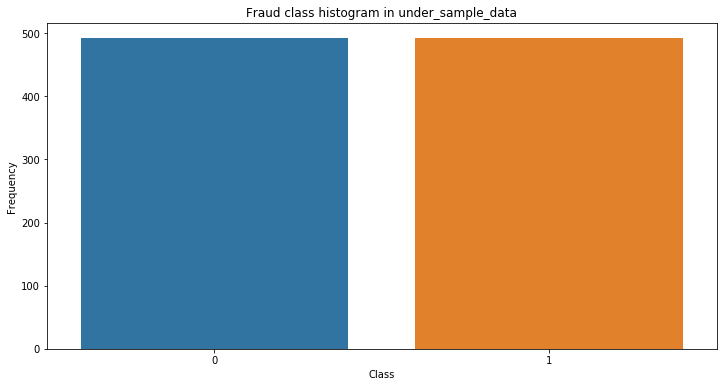

In [30]:
ax = sns.countplot(x="Class", data=under_sample_data)
plt.title("Fraud class histogram in under_sample_data")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

**Correlation Matrix**

Correlation matrix is the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample here) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

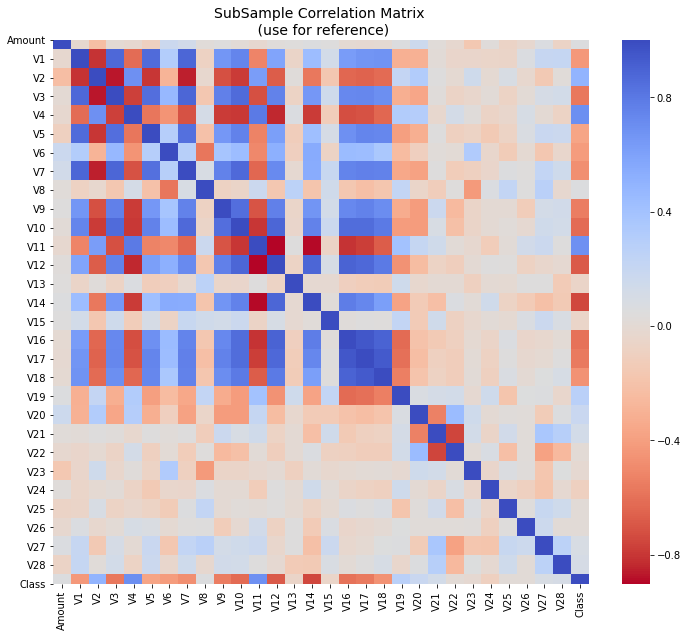

In [31]:
# Make sure we use the subsample in our correlation
f, ax = plt.subplots(1, 1, figsize=(12,10))

# Subsample DataFrame
corr = under_sample_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()



*   Negative Correlations: V17, V14, V12 and V10 are negatively correlated. The lower these values are, the more likely the end result will be a fraud transaction.

*   Positive Correlations: V2, V4, V11, and V19 are positively correlated. The higher these values are, the more likely the end result will be a fraud transaction.




**BoxPlots:** We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

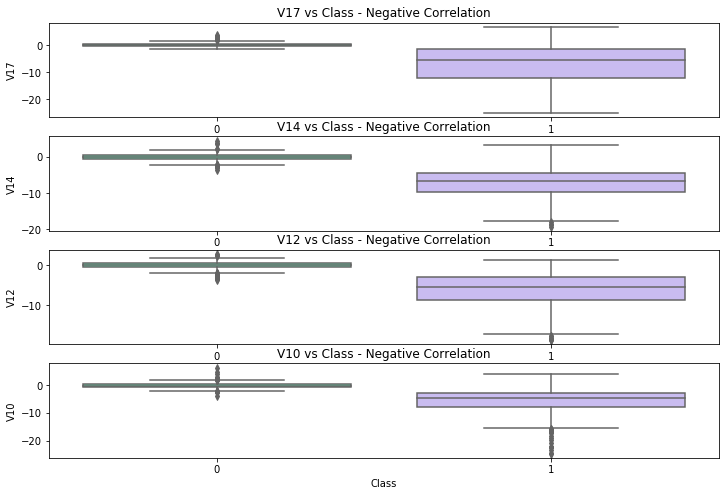

In [33]:
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
colors = ['#56F9BB', '#C5B3F9']
f, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(12,8))

sns.boxplot(x="Class", y="V17", data=under_sample_data, palette=colors, ax=ax1)
ax1.set_title('V17 vs Class - Negative Correlation')

sns.boxplot(x="Class", y="V14", data=under_sample_data, palette=colors, ax=ax2)
ax2.set_title('V14 vs Class - Negative Correlation')


sns.boxplot(x="Class", y="V12", data=under_sample_data, palette=colors, ax=ax3)
ax3.set_title('V12 vs Class - Negative Correlation')


sns.boxplot(x="Class", y="V10", data=under_sample_data, palette=colors, ax=ax4)
ax4.set_title('V10 vs Class - Negative Correlation')

plt.show()

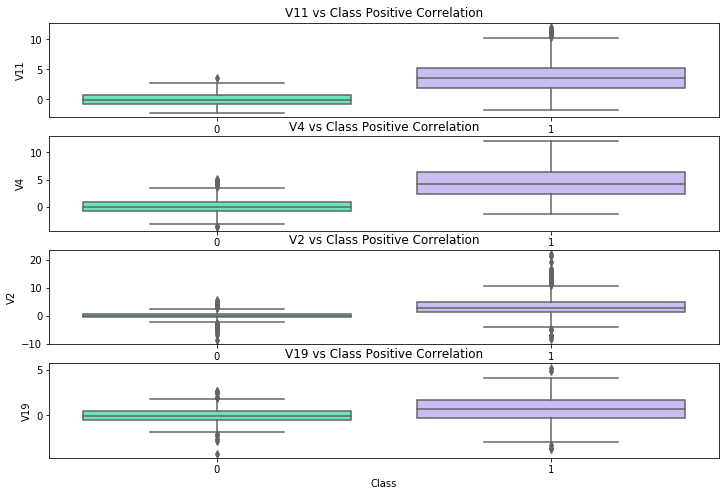

In [34]:
# Positive correlations (The higher the feature value the more likely it will be a fraud transaction)
f, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(12,8))

sns.boxplot(x="Class", y="V11", data=under_sample_data, palette=colors, ax=ax1)
ax1.set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=under_sample_data, palette=colors, ax=ax2)
ax2.set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=under_sample_data, palette=colors, ax=ax3)
ax3.set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=under_sample_data, palette=colors, ax=ax4)
ax4.set_title('V19 vs Class Positive Correlation')

plt.show()

# Having performed EDA and establishing that this is a classification problem, we know that we are to predict the class of the transactions which is binary (Fraud, Non-Fraud)

#Baseline Model

In [35]:
X = df.ix[:, df.columns != 'Class']
y = df.ix[:, df.columns == 'Class']
print(X.shape)
print(y.shape)

(284807, 29)
(284807, 1)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=999)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.333,
                                                            stratify=y_train, random_state=999)
train = pd.concat([X_train, y_train],axis=1)
validation = pd.concat([X_validate, y_validate],axis=1)
test = pd.concat([X_test, y_test],axis=1)

print("Percentage of fraud transactions in train is: ",round(train.Class.mean(),4))
print("Percentage of fraud transactions in test is: ",round(test.Class.mean(),4))
print("Percentage of fraud transactions in validation is: ",round(validation.Class.mean(),4))
print("")
print ("Number of Transactions in Train Dataset: ",len(X_train))
print ("Number of Transactions in Validation Dataset: ",len(X_validate))
print ("Number of Transactions in Test Dataset: ",len(X_test))
print ("Total Number of Transactions: ",len(X_train)+len(X_validate)+len(X_test))


Percentage of fraud transactions in train is:  0.0017
Percentage of fraud transactions in test is:  0.0017
Percentage of fraud transactions in validation is:  0.0017

Number of Transactions in Train Dataset:  142474
Number of Transactions in Validation Dataset:  71131
Number of Transactions in Test Dataset:  71202
Total Number of Transactions:  284807


Since the test set and train set are stratified w.r.t y, there should be equal percentage of fraud transactions in the train and test sets.

Similarly, we should expect to see the equal proportion of fraud transactions in Validation and Train sets.

In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]   #print("Normalized confusion matrix")
    else:
        1   #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

In [43]:
X_train_undersample, X_validate_undersample, y_train_undersample, y_validate_undersample = train_test_split(X_undersample,y_undersample, test_size=0.3, random_state=0)
print ("Number of Transactions in Undersampled Train Dataset: ",len(X_train_undersample))
print ("Number of Transactions in Undersampled Validation Dataset: ",len(X_validate_undersample))
print ("Total Number of Transactions in Undersampled Dataset: ",len(X_train_undersample)+len(X_validate_undersample))

Number of Transactions in Undersampled Train Dataset:  688
Number of Transactions in Undersampled Validation Dataset:  296
Total Number of Transactions in Undersampled Dataset:  984


Predict the values using the undersampled data.

In [78]:
# Setup the hyperparameter grid
penalty = ['l1', 'l2']
c_space = [0.01,0.1,1,10,100]
param_grid = {"penalty": penalty, 'C': c_space}

# Create the classifier: logreg
logreg = LogisticRegression()

# Use GridSearchCV to find the best parameters.
logreg_grid = GridSearchCV(logreg, param_grid, cv=5)

# Fit the classifier to the training data
logreg_grid.fit(X_undersample, y_undersample.values.ravel())

# Print the best parameters and estimator
print("Tuned Logistic Regression Parameters: {}".format(logreg_grid.best_params_)) 
print("Tuned Logistic Regression Estimator: {}".format(logreg_grid.best_estimator_)) 

# Fit and predict using the best estimator on undersampled test data
logreg_undersample = logreg_grid.best_estimator_

Tuned Logistic Regression Parameters: {'C': 100, 'penalty': 'l1'}
Tuned Logistic Regression Estimator: LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [0]:
logreg_undersample = logreg_undersample.fit(X_train_undersample, y_train_undersample.values.ravel())
pred_logreg_undersample = logreg_undersample.predict(X_validate_undersample)

[[142   7]
 [ 10 137]]


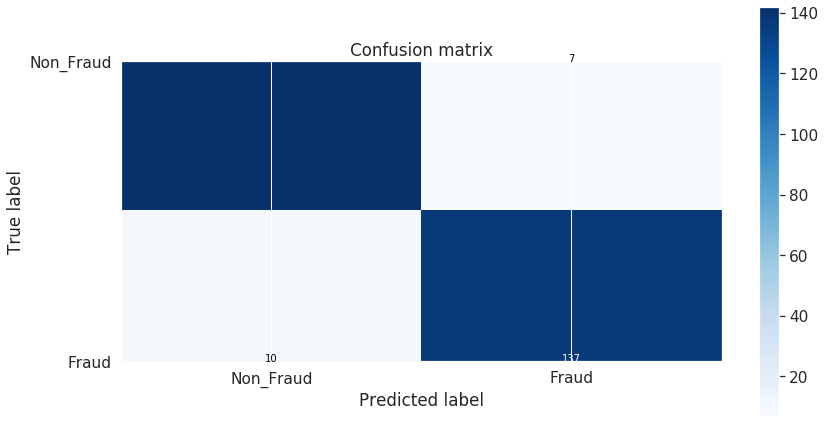

----------- Classification Report --- Undersampled Data -----------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       149
           1       0.95      0.93      0.94       147

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

----------------------------------------------------------------------
Recall Score of the undersampled Logistic Regression model on validation data is:  0.9319727891156463
Precision Score of the undersampled Logistic Regression model on validation data is:  0.9513888888888888


In [181]:
# Print Confusion Matrix
class_names = ["Non_Fraud", 'Fraud']
cnf_matrix = confusion_matrix(y_validate_undersample, pred_logreg_undersample)
print(cnf_matrix)
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names)
plt.show()

print('----------- Classification Report --- Undersampled Data -----------')
print(classification_report(y_validate_undersample, pred_logreg_undersample))

print("-"*70)
print("Recall Score of the undersampled Logistic Regression model on validation data is: ", recall_score(y_validate_undersample, pred_logreg_undersample))
print("Precision Score of the undersampled Logistic Regression model on validation data is: ", precision_score(y_validate_undersample, pred_logreg_undersample))

The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

In [0]:
##Use the bet parameters obtained through GridSearch and predict on the entire validation set, not just the undersampled validation set.
pred_logreg = logreg_undersample.predict(X_validate)

[[67861  3147]
 [   10   113]]


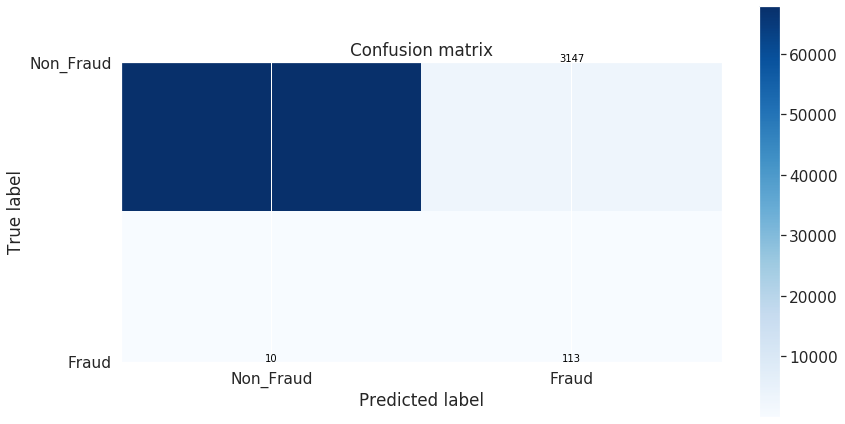

----------- Classification Report -----------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71008
           1       0.03      0.92      0.07       123

    accuracy                           0.96     71131
   macro avg       0.52      0.94      0.52     71131
weighted avg       1.00      0.96      0.98     71131

----------------------------------------------------------------------
Recall Score of the baseline Logistic Regression model on validation data is:  0.9186991869918699
Precision Score of the baseline Logistic Regression model on validation data is:  0.034662576687116566


In [182]:
# Print Confusion Matrix
class_names = ["Non_Fraud", 'Fraud']
cnf_matrix = confusion_matrix(y_validate, pred_logreg)
print(cnf_matrix)
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names)
plt.show()

print('----------- Classification Report -----------')
print(classification_report(y_validate, pred_logreg))

print("-"*70)
print("Recall Score of the baseline Logistic Regression model on validation data is: ", recall_score(y_validate, pred_logreg))
print("Precision Score of the baseline Logistic Regression model on validation data is: ", precision_score(y_validate, pred_logreg))

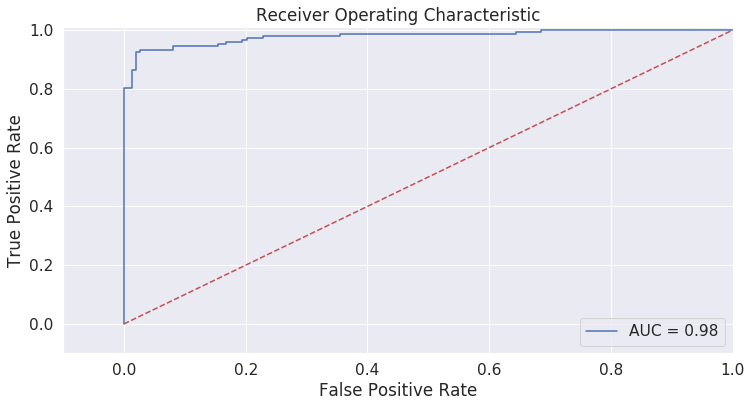

In [132]:
y_pred_undersample_score = logreg_undersample.decision_function(X_validate_undersample.values)

fpr, tpr, thresholds = roc_curve(y_validate_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Logistic Regression ROC AUC = 0.937


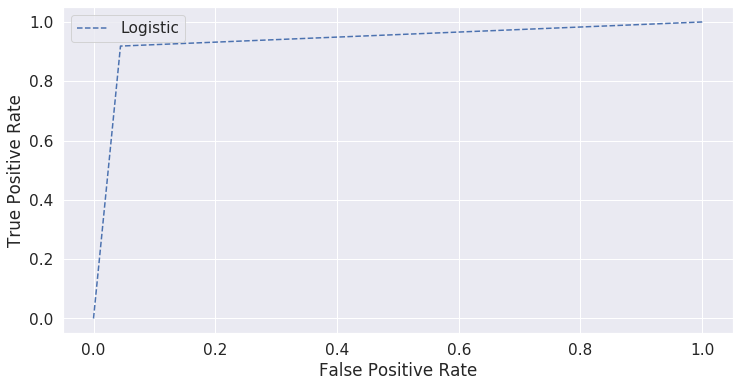

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot

lr_auc = roc_auc_score(y_validate, pred_logreg)

print("Logistic Regression ROC AUC = %.3f" %(lr_auc))

lr_fpr, lr_tpr, _ = roc_curve(y_validate, pred_logreg)
#Plot roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, linestyle = '--', label='Logistic')
#axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
#Show legend and the plot
pyplot.legend()
pyplot.show()

##Oversampling the minority class in the train data using **SMOTE**.

In [134]:
# Setup the hyperparameter grid
penalty = ['l1', 'l2']
c_space = [0.01,0.1,1,10,100]
param_grid = {"penalty": penalty, 'C': c_space}

# Create the classifier: logreg
logreg = LogisticRegression()

# Use GridSearchCV to find the best parameters.
logreg_grid = GridSearchCV(logreg, param_grid, cv=5)

# Fit the classifier to the training data
logreg_grid.fit(X_train, y_train.values.ravel())

# Print the best parameters and estimator
print("Tuned Logistic Regression Parameters: {}".format(logreg_grid.best_params_)) 
print("Tuned Logistic Regression Estimator: {}".format(logreg_grid.best_estimator_)) 

# Fit and predict using the best estimator on undersampled test data
logreg = logreg_grid.best_estimator_

Tuned Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2'}
Tuned Logistic Regression Estimator: LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [136]:
sm = SMOTE(random_state=9,kind='regular')
X_oversample, y_oversample = sm.fit_sample(X_train, y_train)
pd.value_counts(y_oversample)

1    142228
0    142228
dtype: int64

In [138]:
#Fit the Logistic Regression modle with best parameters
logreg.fit(X_oversample, y_oversample)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Oversampled Logistic regression model ROC AUC = 0.933


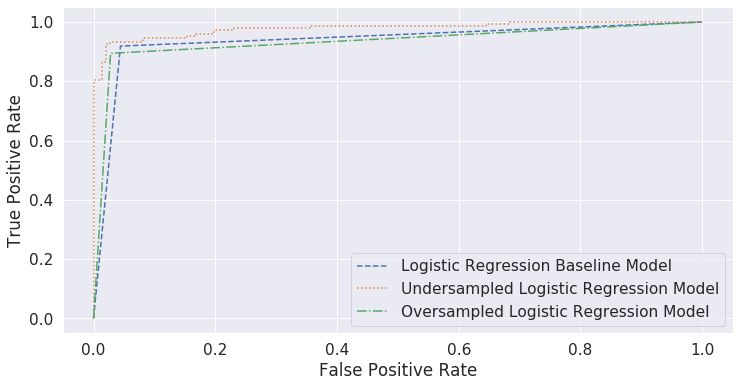

In [139]:
pred_logreg_oversample = logreg.predict(X_validate)

logreg_oversample_auc = roc_auc_score(y_validate, pred_logreg_oversample)

print("Oversampled Logistic regression model ROC AUC = %.3f" %(logreg_oversample_auc))

logreg_oversample_fpr, logreg_oversample_tpr, _ = roc_curve(y_validate, pred_logreg_oversample)
#Plot roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, linestyle = '--', label='Logistic Regression Baseline Model')
pyplot.plot(fpr, tpr, linestyle = ':', label='Undersampled Logistic Regression Model')
pyplot.plot(logreg_oversample_fpr, logreg_oversample_tpr, linestyle = '-.', label='Oversampled Logistic Regression Model')
#axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
#Show legend and the plot
pyplot.legend()
pyplot.show()

Undersampled model of the Logistic regression has the highest ROC AUC and the Logistic Regression model fit using the undersampled data and tested on the validation data showed almost the same ROC AUC as of Oversampled Logistic Regression Model.

[[69018  1990]
 [   13   110]]


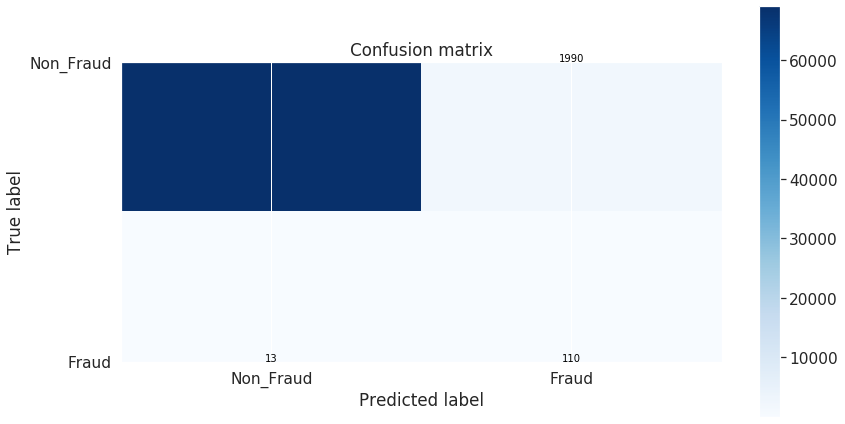

----------- Classification Report -----------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71008
           1       0.05      0.89      0.10       123

    accuracy                           0.97     71131
   macro avg       0.53      0.93      0.54     71131
weighted avg       1.00      0.97      0.98     71131

----------------------------------------------------------------------
Recall Score of the oversampled Logistic Regression model on validation data is:  0.8943089430894309
Precision Score of the oversampled Logistic Regression model on validation data is:  0.05238095238095238


In [140]:
# Print Confusion Matrix
class_names = ["Non_Fraud", 'Fraud']
cnf_matrix = confusion_matrix(y_validate, pred_logreg_oversample)
print(cnf_matrix)
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names)
plt.show()

print('----------- Classification Report -----------')
print(classification_report(y_validate, pred_logreg_oversample))

print("-"*70)
print("Recall Score of the oversampled Logistic Regression model on validation data is: ", recall_score(y_validate, pred_logreg_oversample))
print("Precision Score of the oversampled Logistic Regression model on validation data is: ", precision_score(y_validate, pred_logreg_oversample))

##Random Forest Classifier

###Undersampled Random Forest Model

In [146]:
best_n_estimators = 0
best_F1 = 0
n_estimators = [10,20,30,40,50,60,70,80,90,100,125,150,175,200]
score_list = ['accuracy', 'recall', 'precision', 'f1']
for estimator in n_estimators:
   print("--"*75)
   print("n_estimator: ", estimator)
   rf = RandomForestClassifier(n_estimators=estimator, bootstrap=True, random_state=99)
   scores = cross_validate(rf, X_undersample, y_undersample.values.ravel(), 
                           scoring=score_list, return_train_score=False, cv=10)
   print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
   for s in score_list:
     var = "test_"+s
     mean = scores[var].mean()
     std = scores[var].std()
     print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))
     if s == "f1" and best_F1 < mean:
       best_F1 = mean
       best_n_estimators = estimator

------------------------------------------------------------------------------------------------------------------------------------------------------
n_estimator:  10
Metric.......  Mean    Std. Dev.
accuracy..... 0.9317    0.0399
recall....... 0.8919    0.0726
precision.... 0.9692    0.0248
f1........... 0.9275    0.0440
------------------------------------------------------------------------------------------------------------------------------------------------------
n_estimator:  20
Metric.......  Mean    Std. Dev.
accuracy..... 0.9338    0.0383
recall....... 0.8960    0.0794
precision.... 0.9696    0.0155
f1........... 0.9294    0.0435
------------------------------------------------------------------------------------------------------------------------------------------------------
n_estimator:  30
Metric.......  Mean    Std. Dev.
accuracy..... 0.9358    0.0385
recall....... 0.8981    0.0786
precision.... 0.9720    0.0211
f1........... 0.9316    0.0439
-------------------------

In [147]:
print("The best estimator with F1 = ", best_F1)
print("n_estimators ", best_n_estimators )

The best estimator with F1 =  0.9387196223958819
n_estimators  40


In [153]:
rf_undersample = RandomForestClassifier(n_estimators=40, bootstrap=True, random_state=7099)
rf_undersample.fit(X_train_undersample, y_train_undersample.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=7099,
                       verbose=0, warm_start=False)

[[143   6]
 [ 11 136]]


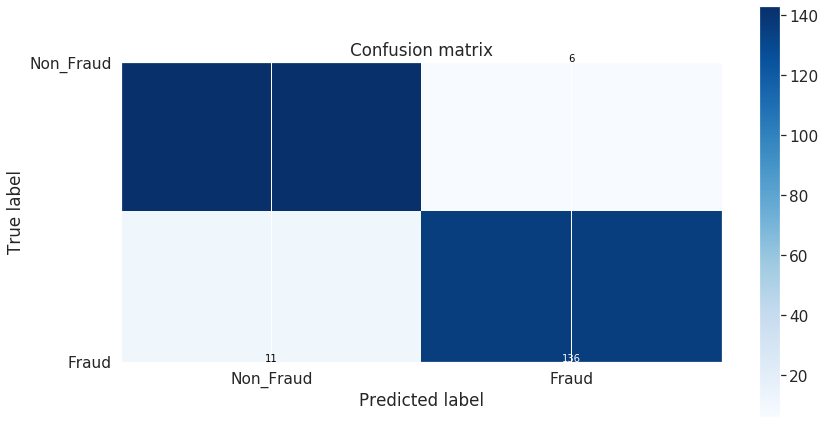

----------- Classification Report --- Undersampled Data -----------
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       149
           1       0.96      0.93      0.94       147

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

----------------------------------------------------------------------
Recall Score of the undersampled model on validation data is:  0.9251700680272109
Precision Score of the undersampled model validation data is:  0.9577464788732394


In [165]:
pred_rf_undersample = rf_undersample.predict(X_validate_undersample)
# Print Confusion Matrix
class_names = ["Non_Fraud", 'Fraud']
cnf_matrix = confusion_matrix(y_validate_undersample, pred_rf_undersample)
print(cnf_matrix)
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names)
plt.show()

print('----------- Classification Report --- Undersampled Data -----------')
print(classification_report(y_validate_undersample, pred_rf_undersample))

print("-"*70)
print("Recall Score of the undersampled model on validation data is: ", recall_score(y_validate_undersample, pred_rf_undersample))
print("Precision Score of the undersampled model validation data is: ", precision_score(y_validate_undersample, pred_rf_undersample))

Undersampled random Forest Model ROC AUC = 0.942


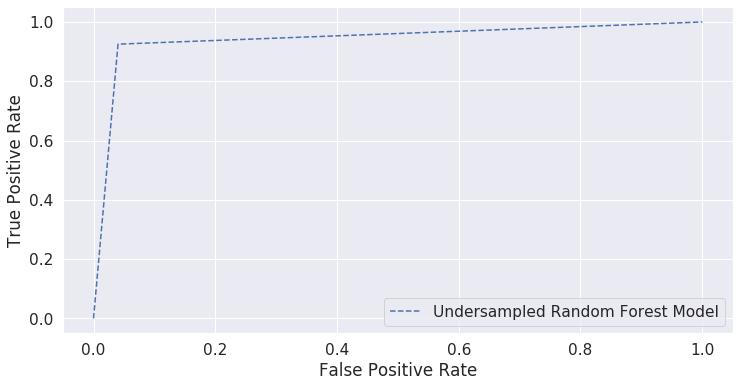

In [155]:
rf_undersample_auc = roc_auc_score(y_validate_undersample, pred_rf_undersample)

print("Undersampled random Forest Model ROC AUC = %.3f" %(rf_undersample_auc))

rf_undersample_fpr, rf_undersample_tpr, _ = roc_curve(y_validate_undersample, pred_rf_undersample)
#Plot roc curve for the model
pyplot.plot(rf_undersample_fpr, rf_undersample_tpr, linestyle = '--', label='Undersampled Random Forest Model')
#axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
#Show legend and the plot
pyplot.legend()
pyplot.show()

###Random Forest Model Baseline

In [166]:
rf = RandomForestClassifier(n_estimators=40, bootstrap=True, random_state=99)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

[[71002     6]
 [   27    96]]


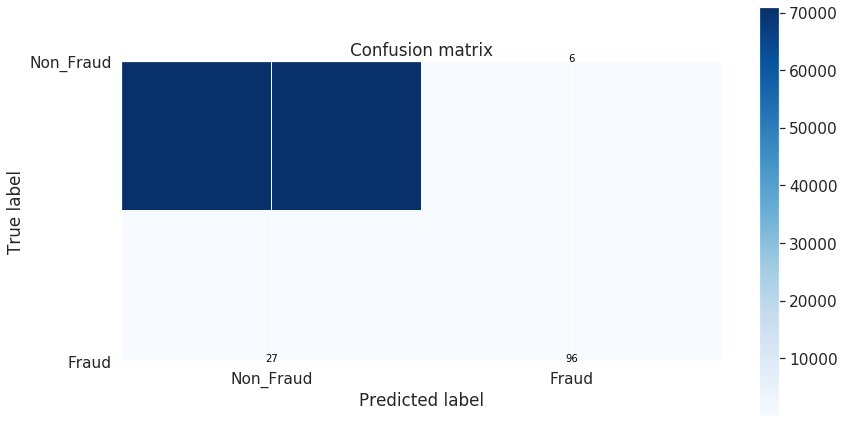

----------- Classification Report --- Undersampled Data -----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71008
           1       0.94      0.78      0.85       123

    accuracy                           1.00     71131
   macro avg       0.97      0.89      0.93     71131
weighted avg       1.00      1.00      1.00     71131

----------------------------------------------------------------------
Recall Score of the baseline model on validation data is:  0.7804878048780488
Precision Score of the baseline model on validation data is:  0.9411764705882353


In [167]:
pred_rf = rf.predict(X_validate)
# Print Confusion Matrix
class_names = ["Non_Fraud", 'Fraud']
cnf_matrix = confusion_matrix(y_validate, pred_rf)
print(cnf_matrix)
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names)
plt.show()

print('----------- Classification Report --- Undersampled Data -----------')
print(classification_report(y_validate, pred_rf))

print("-"*70)
print("Recall Score of the baseline model on validation data is: ", recall_score(y_validate, pred_rf))
print("Precision Score of the baseline model on validation data is: ", precision_score(y_validate, pred_rf))

###Oversampled Random Forest Model 

In [161]:
rf_oversample = RandomForestClassifier(n_estimators=40, bootstrap=True, random_state=99)
rf_oversample.fit(X_oversample, y_oversample.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

[[71000     8]
 [   29    94]]


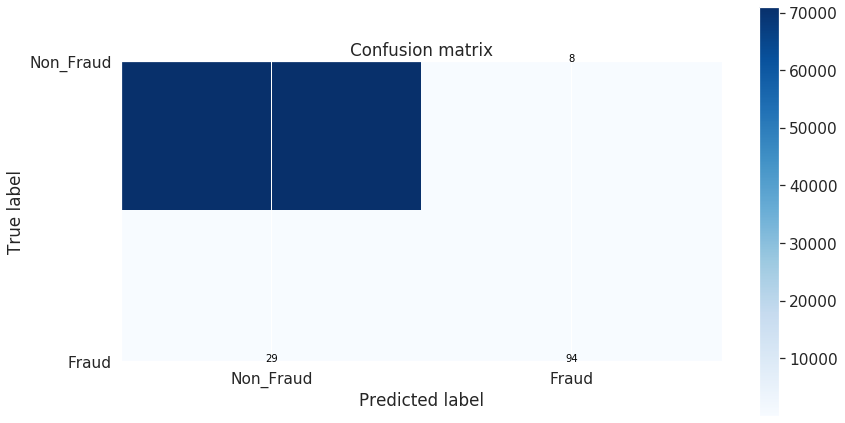

----------- Classification Report --- Undersampled Data -----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71008
           1       0.92      0.76      0.84       123

    accuracy                           1.00     71131
   macro avg       0.96      0.88      0.92     71131
weighted avg       1.00      1.00      1.00     71131

----------------------------------------------------------------------
Recall Score of the oversampled model on validation data is:  0.7642276422764228
Precision Score of the oversampled model on validation data is:  0.9215686274509803


In [162]:
pred_rf_oversample = rf_oversample.predict(X_validate)
# Print Confusion Matrix
class_names = ["Non_Fraud", 'Fraud']
cnf_matrix = confusion_matrix(y_validate, pred_rf_oversample)
print(cnf_matrix)
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names)
plt.show()

print('----------- Classification Report --- Undersampled Data -----------')
print(classification_report(y_validate, pred_rf_oversample))

print("-"*70)
print("Recall Score of the oversampled model on validation data is: ", recall_score(y_validate, pred_rf_oversample))
print("Precision Score of the oversampled model on validation data is: ", precision_score(y_validate, pred_rf_oversample))

Undersampled Random Forest Model ROC AUC = 0.942
Baseline Random Forest Model ROC AUC = 0.890
Oversampled Logistic regression model ROC AUC = 0.882


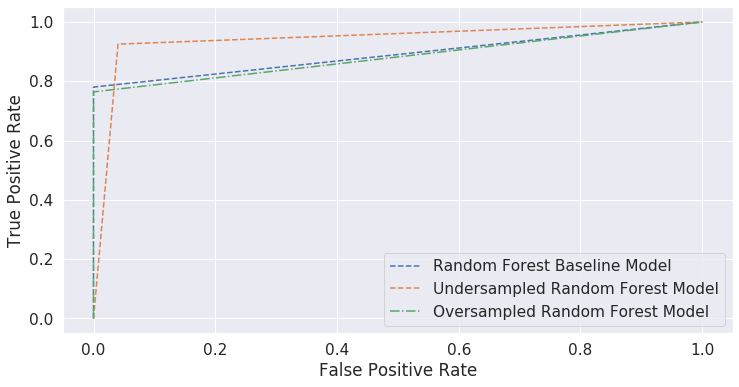

In [168]:
rf_oversample_auc = roc_auc_score(y_validate, pred_rf_oversample)
rf_auc = roc_auc_score(y_validate, pred_rf )
print("Undersampled Random Forest Model ROC AUC = %.3f" %(rf_undersample_auc))
print("Baseline Random Forest Model ROC AUC = %.3f" %(rf_auc))
print("Oversampled Logistic regression model ROC AUC = %.3f" %(rf_oversample_auc))
rf_fpr, rf_tpr, _ = roc_curve(y_validate, pred_rf)
rf_oversample_fpr, rf_oversample_tpr, _ = roc_curve(y_validate, pred_rf_oversample)

#Plot roc curve for the model
pyplot.plot(rf_fpr, rf_tpr, linestyle = '--', label='Random Forest Baseline Model')
pyplot.plot(rf_undersample_fpr, rf_undersample_tpr, linestyle = '--', label='Undersampled Random Forest Model')
pyplot.plot(rf_oversample_fpr, rf_oversample_tpr, linestyle = '-.', label='Oversampled Random Forest Model')
#axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
#Show legend and the plot
pyplot.legend()
pyplot.show()

**Results and Discussion**

Model    | AUC | Recall Score | Precision Score
---------|-----|--------------|----------------
Logistic Regression Model_Undersampled|0.98|0.93|0.951
Logistic Regression Model_Baseline|0.94|0.92|0.034
Logistic Regression Model_Oversampled|0.93|0.89|0.05
Random Forest Model_Undersampled|0.94|0.92|0.95
Random Forest Model_Baseline|0.89|0.78|0.94
Random Forest Model_Oversampled|0.88|0.76|0.92


---

Considering the tradeoff, Random Forest Model fit on the training data with the best parameters choosen on fitting the model on undersampled data performed the best with recall_score of 0.78 and precision_score of 0.94.

In the case of imbalanced problems, accuracy_score can not be used a s as metric since it could be misleading due to the presence of non-fraud data in the given dataset. This is why, Recall and Precision is used for trade off to choose the best model.

